In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, LinearRegression
from utils import *
from fil import FIL_Linear, FIL_Logistic
import scipy
import os

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/__init__.py:149: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.16.3
  UserWarning)


## Linear Toy Dataset

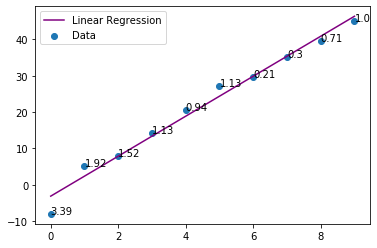

In [2]:
np.random.seed(207)

# define dataset
X_linear = np.arange(10)
y_linear = X_linear * 5 + np.random.normal(size=len(X_linear))
y_linear[0] = -8 # extraneous outlier
X_linear = add_bias(X_linear)

# compute FILs
fil_model = FIL_Linear(lam=0)
fil_model.train(X_linear, y_linear)
all_fils = fil_model.compute_all_fils()

# plot dataset
plt.scatter(remove_bias(X_linear), y_linear, label="Data")
plt.plot(fil_model.predict(X_linear), color="purple", label="Linear Regression")
for i, txt in enumerate(all_fils):
    plt.annotate(round(txt.item(),2), (remove_bias(X_linear)[i], y_linear[i]))
plt.legend()
plt.savefig("linear-toy")
plt.show()

[5.62457270e-65 2.84434992e-38 1.67439861e-34 4.54027608e-30
 2.87442198e-22 9.18045379e-28 1.00000000e+01 1.85255485e-09
 1.36747595e-23 4.62231874e-37]
[-0.56784496  5.13607443]


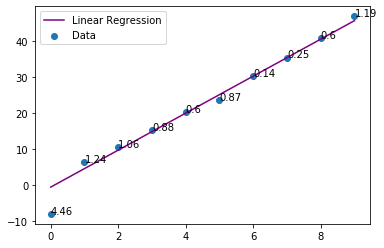

In [12]:
# define dataset
X_linear = np.arange(10)
y_linear = X_linear * 5 + np.random.normal(size=len(X_linear))
y_linear[0] = -8 # extraneous outlier
X_linear = add_bias(X_linear)

# compute FILs
fil_model = FIL_Linear(lam=0)
weights = fil_model.irfil(X_linear, y_linear, 50, 0.1)
print(weights)
print(fil_model.w)
all_fils = fil_model.compute_all_fils()

# plot dataset
plt.scatter(remove_bias(X_linear), y_linear, label="Data")
plt.plot(fil_model.predict(X_linear), color="purple", label="Linear Regression")
for i, txt in enumerate(all_fils):
    plt.annotate(round(txt.item(),2), (remove_bias(X_linear)[i], y_linear[i]))
plt.legend()
plt.savefig("reweighted-toy-linear")
plt.show()

## Logistic Toy Dataset

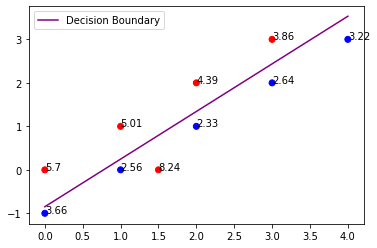

In [4]:
# define dataset
X = np.array([[x, x] for x in range(4)] + [[x, x-1] for x in range(5)])
X_logistic = add_bias(np.vstack((X, np.array([[1.5, 0]])))) # Add one atypical data point 
y_logistic = np.array([1] * 4 + [0] * 5 + [1]) # labels

# compute FILs
fil_model = FIL_Logistic(lam=0)
fil_model.train(X_logistic, y_logistic)
all_fils = fil_model.compute_all_fils()

plt.scatter(X_logistic[:,1], X_logistic[:,2], color=[col(y_val) for y_val in y_logistic])
plt.plot(*fil_model.decision_boundary(0, 4), color="purple", label="Decision Boundary")
for i, txt in enumerate(all_fils):
    plt.annotate(round(txt.item(),2), (X_logistic[i, 1], X_logistic[i, 2]))
plt.legend()
plt.savefig("logistic-toy")
plt.show()

## Reweighted FIL - Logistic Regression

[2.20061978e-02 3.59017191e-01 2.74469465e-01 3.35970498e+00
 9.07022596e-06 4.70173339e-03 7.03126847e-02 7.82072933e-01
 5.12770575e+00 1.49114502e-24]


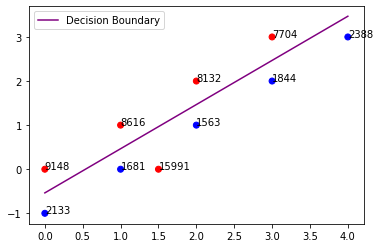

In [13]:
# (re)define dataset
X = np.array([[x, x] for x in range(4)] + [[x, x-1] for x in range(5)])
X_logistic = add_bias(np.vstack((X, np.array([[1.5, 0]])))) # Add one atypical data point 
y_logistic = np.array([1] * 4 + [0] * 5 + [1]) # labels

# compute FILs
fil_model = FIL_Logistic(lam=0)
weights = fil_model.irfil(X_logistic, y_logistic, 50, 0.1)
print(weights)
all_fils = fil_model.compute_all_fils()

plt.scatter(X_logistic[:,1], X_logistic[:,2], color=[col(y_val) for y_val in y_logistic])
plt.plot(*fil_model.decision_boundary(0, 4), color="purple", label="Decision Boundary")
for i, txt in enumerate(all_fils):
    plt.annotate(round(txt.item()), (X_logistic[i, 1], X_logistic[i, 2]))
plt.legend()
plt.savefig("reweighted-toy")
plt.show()

## MNIST Dataset - Logistic Regression

0.9988156336360048
lowest


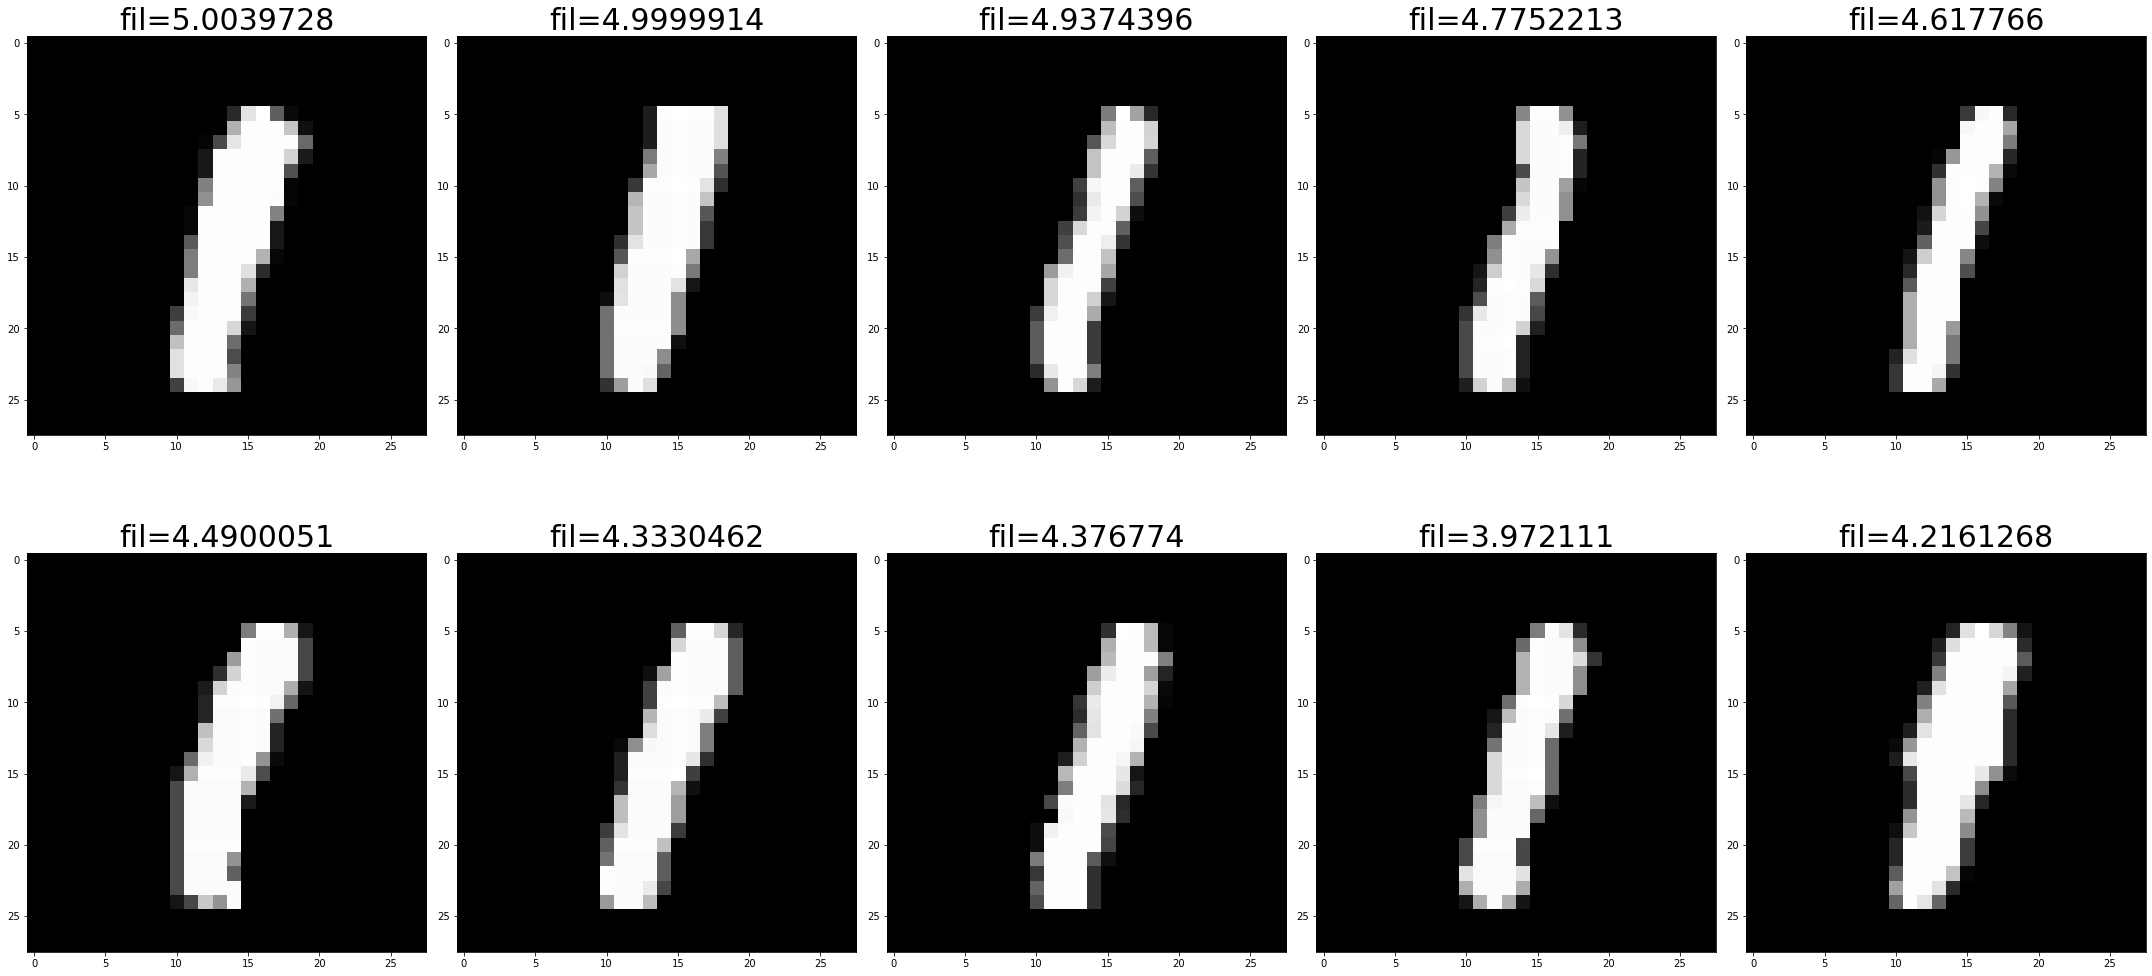

highest


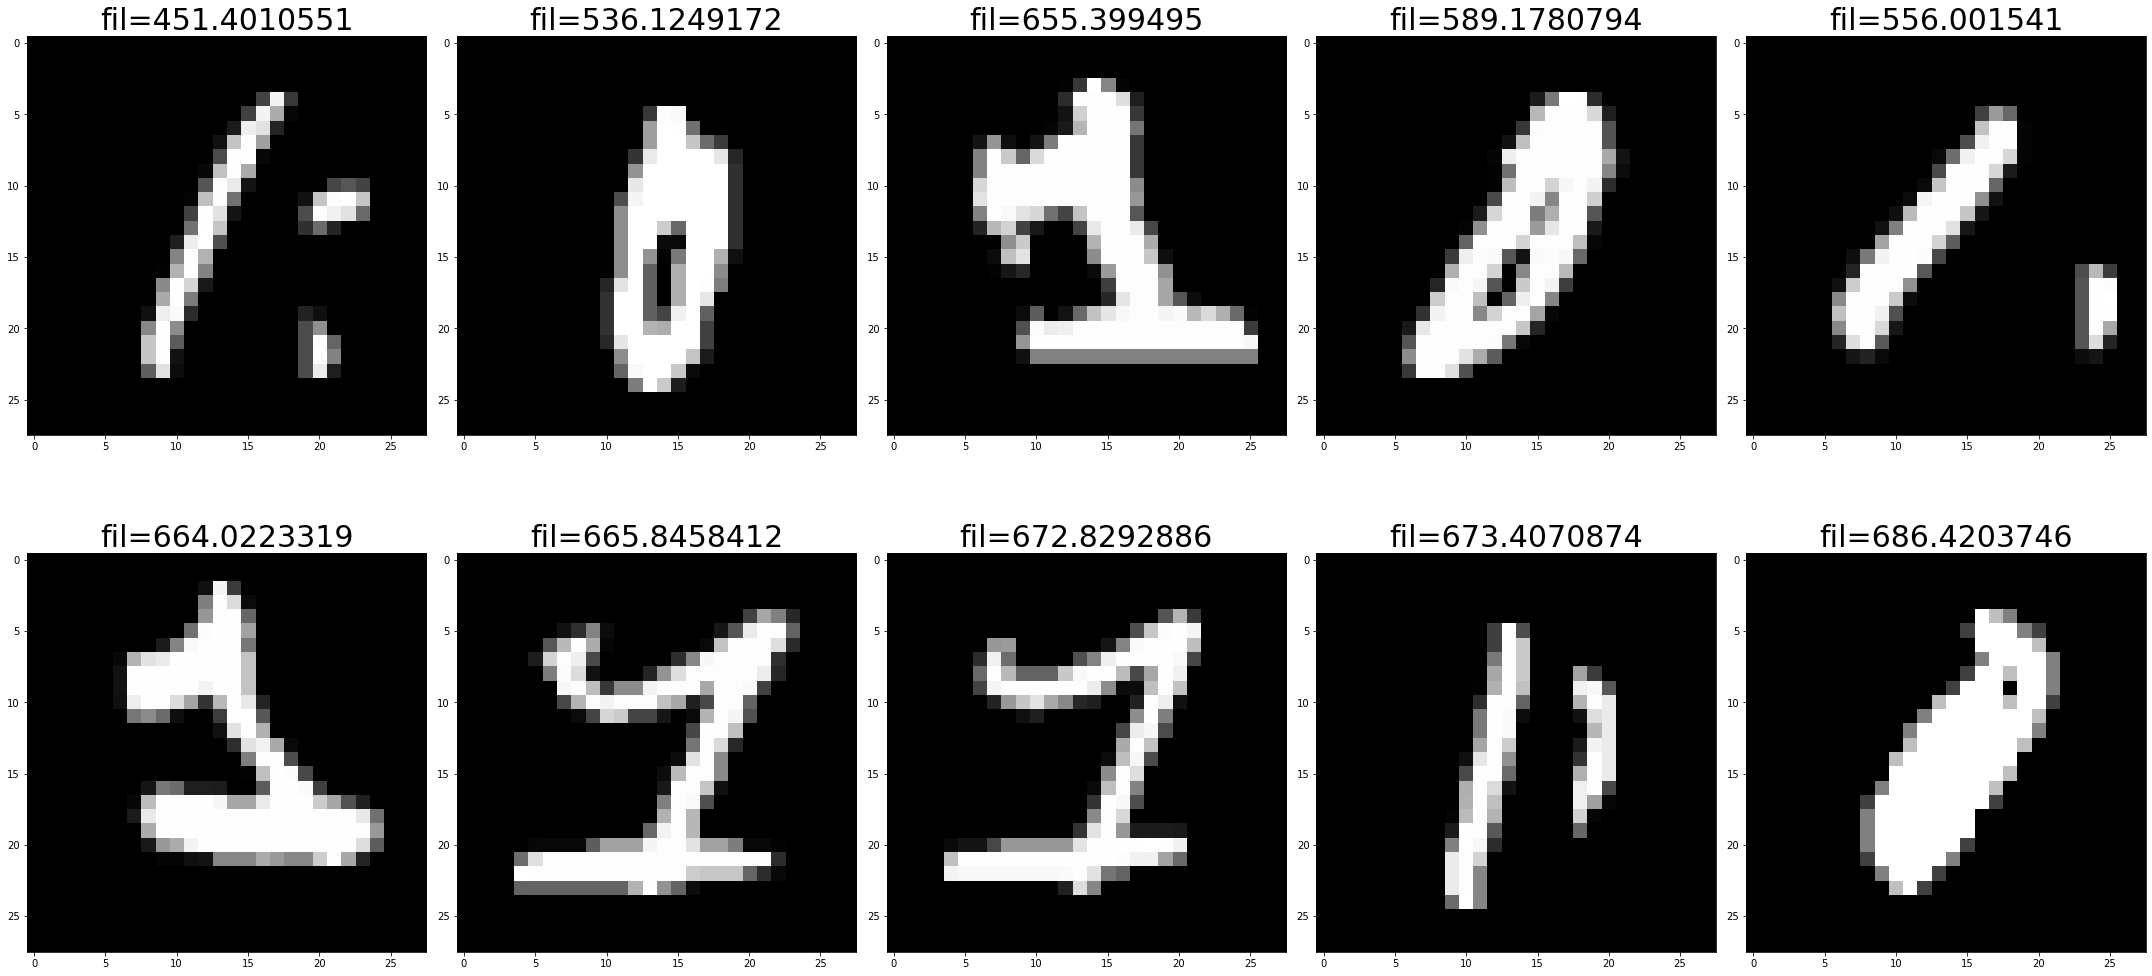

0.9434882895670689
lowest


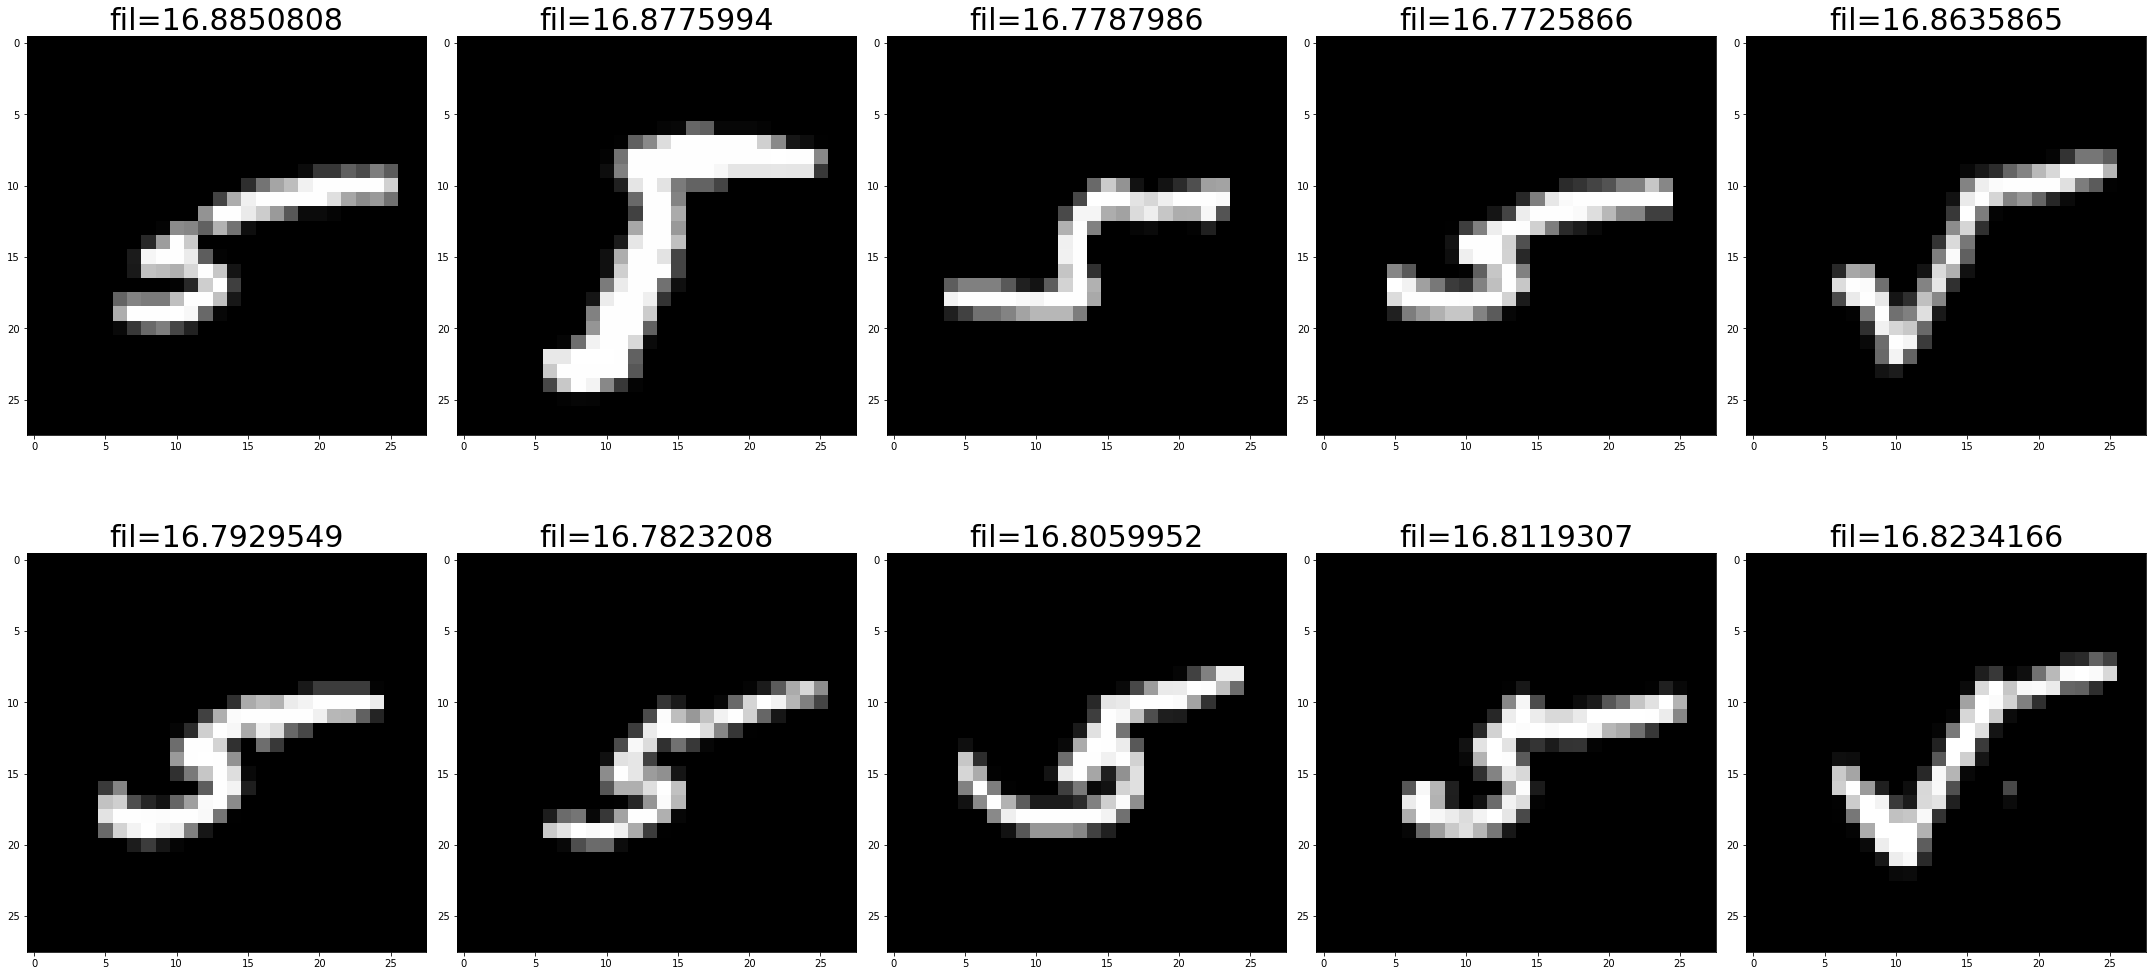

highest


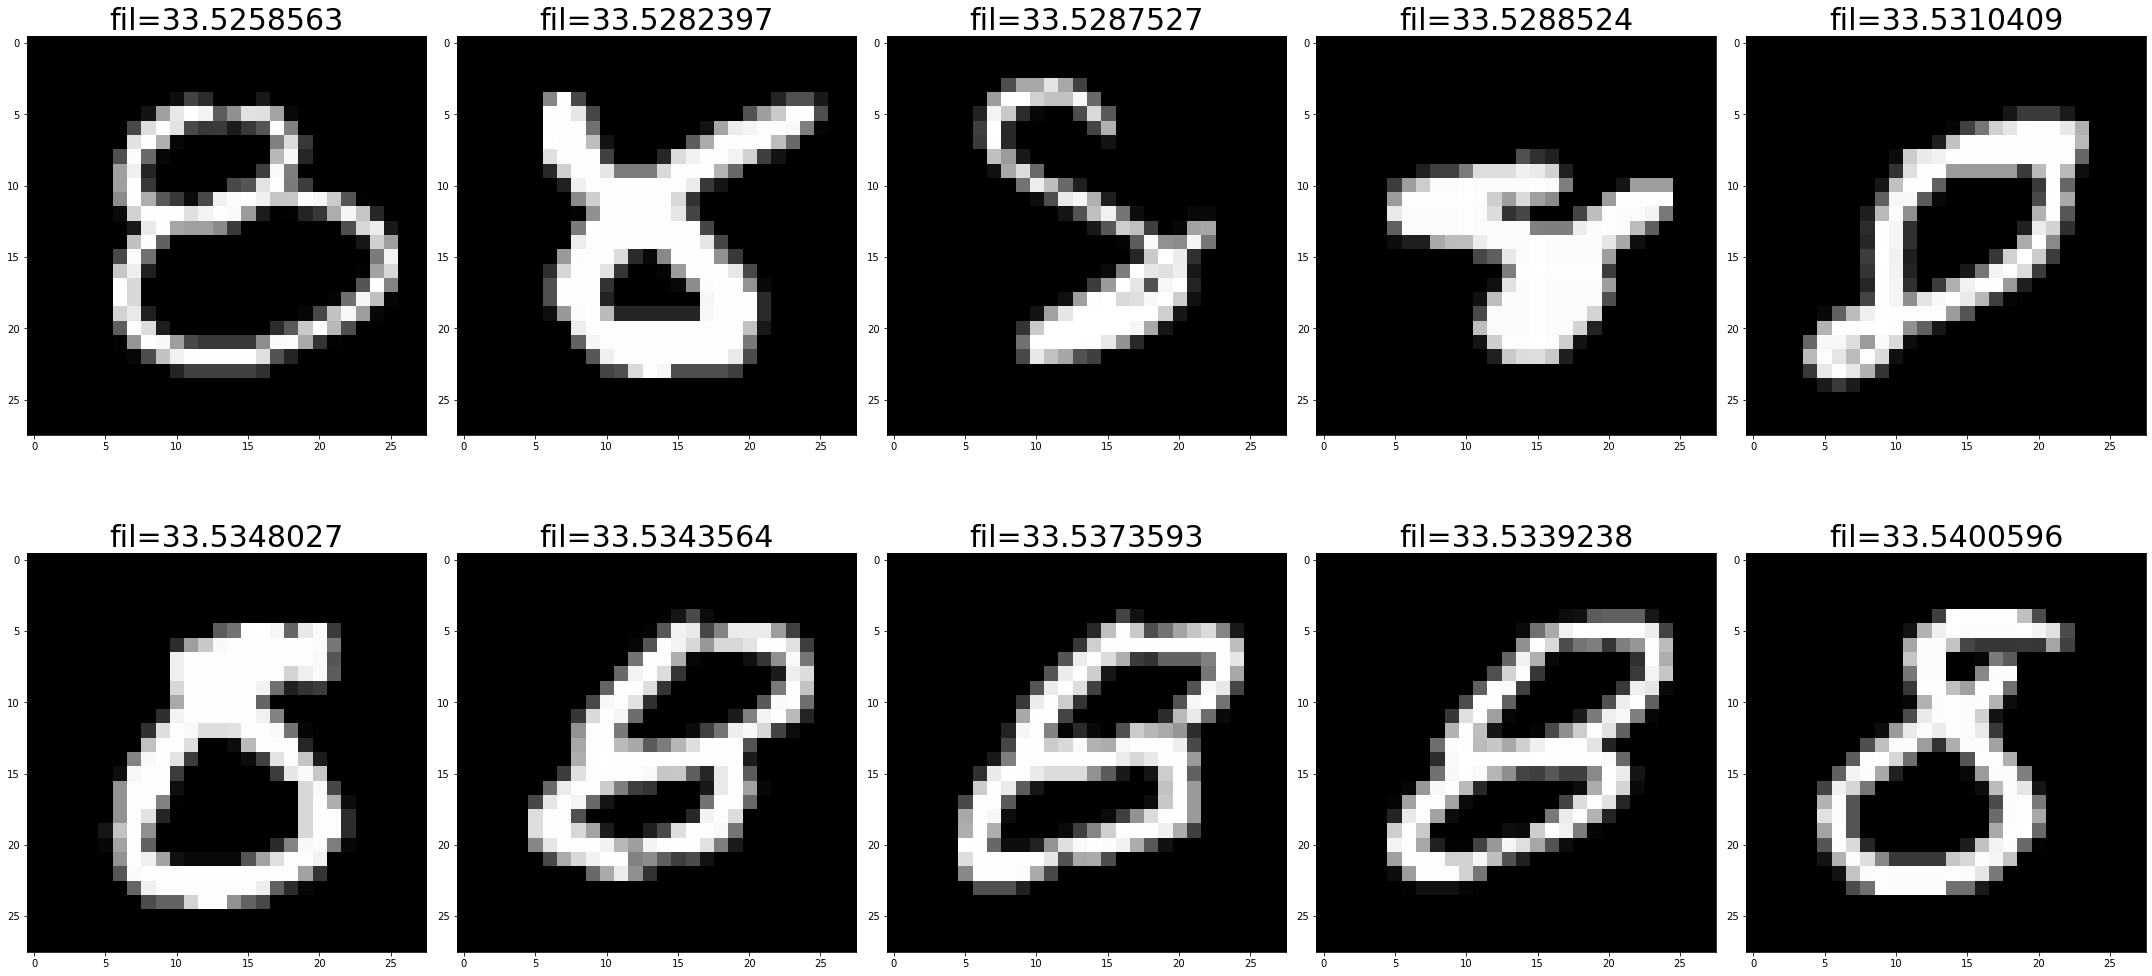

0.9759805156630553
lowest


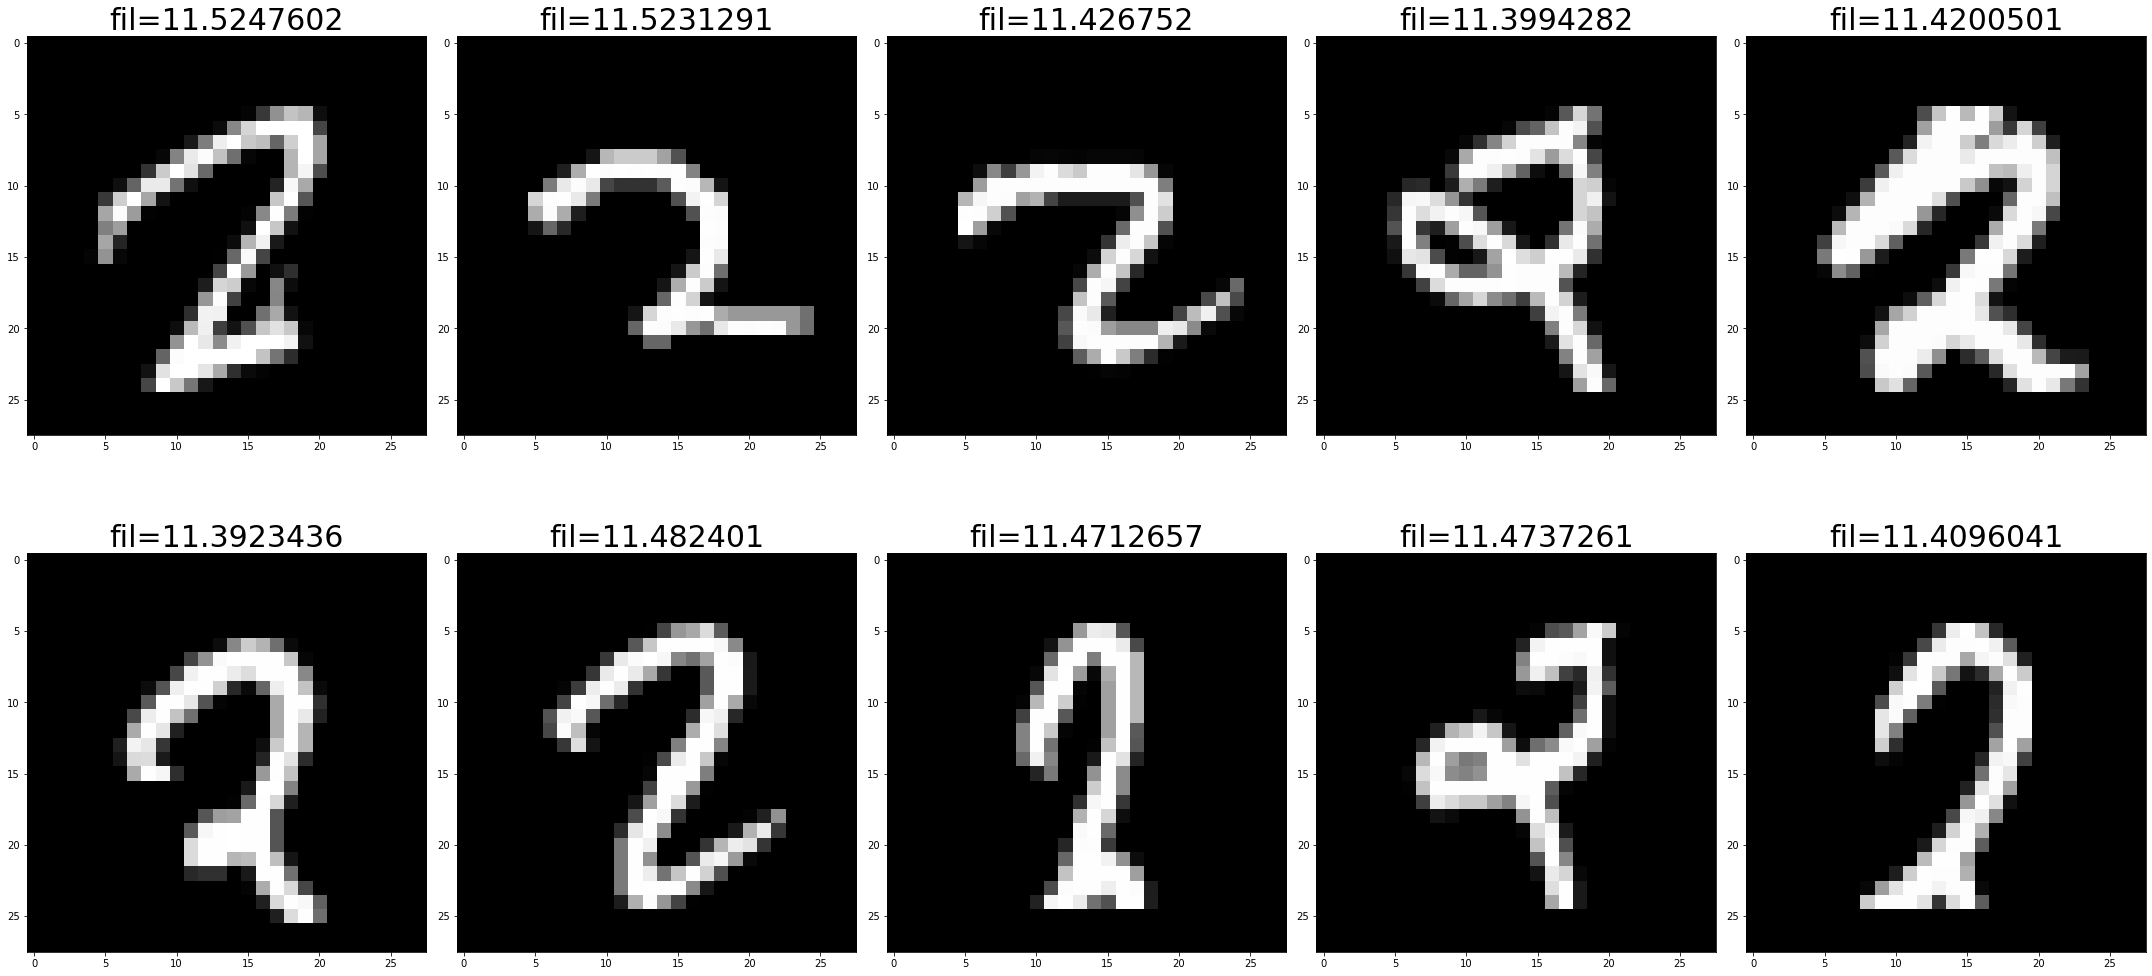

highest


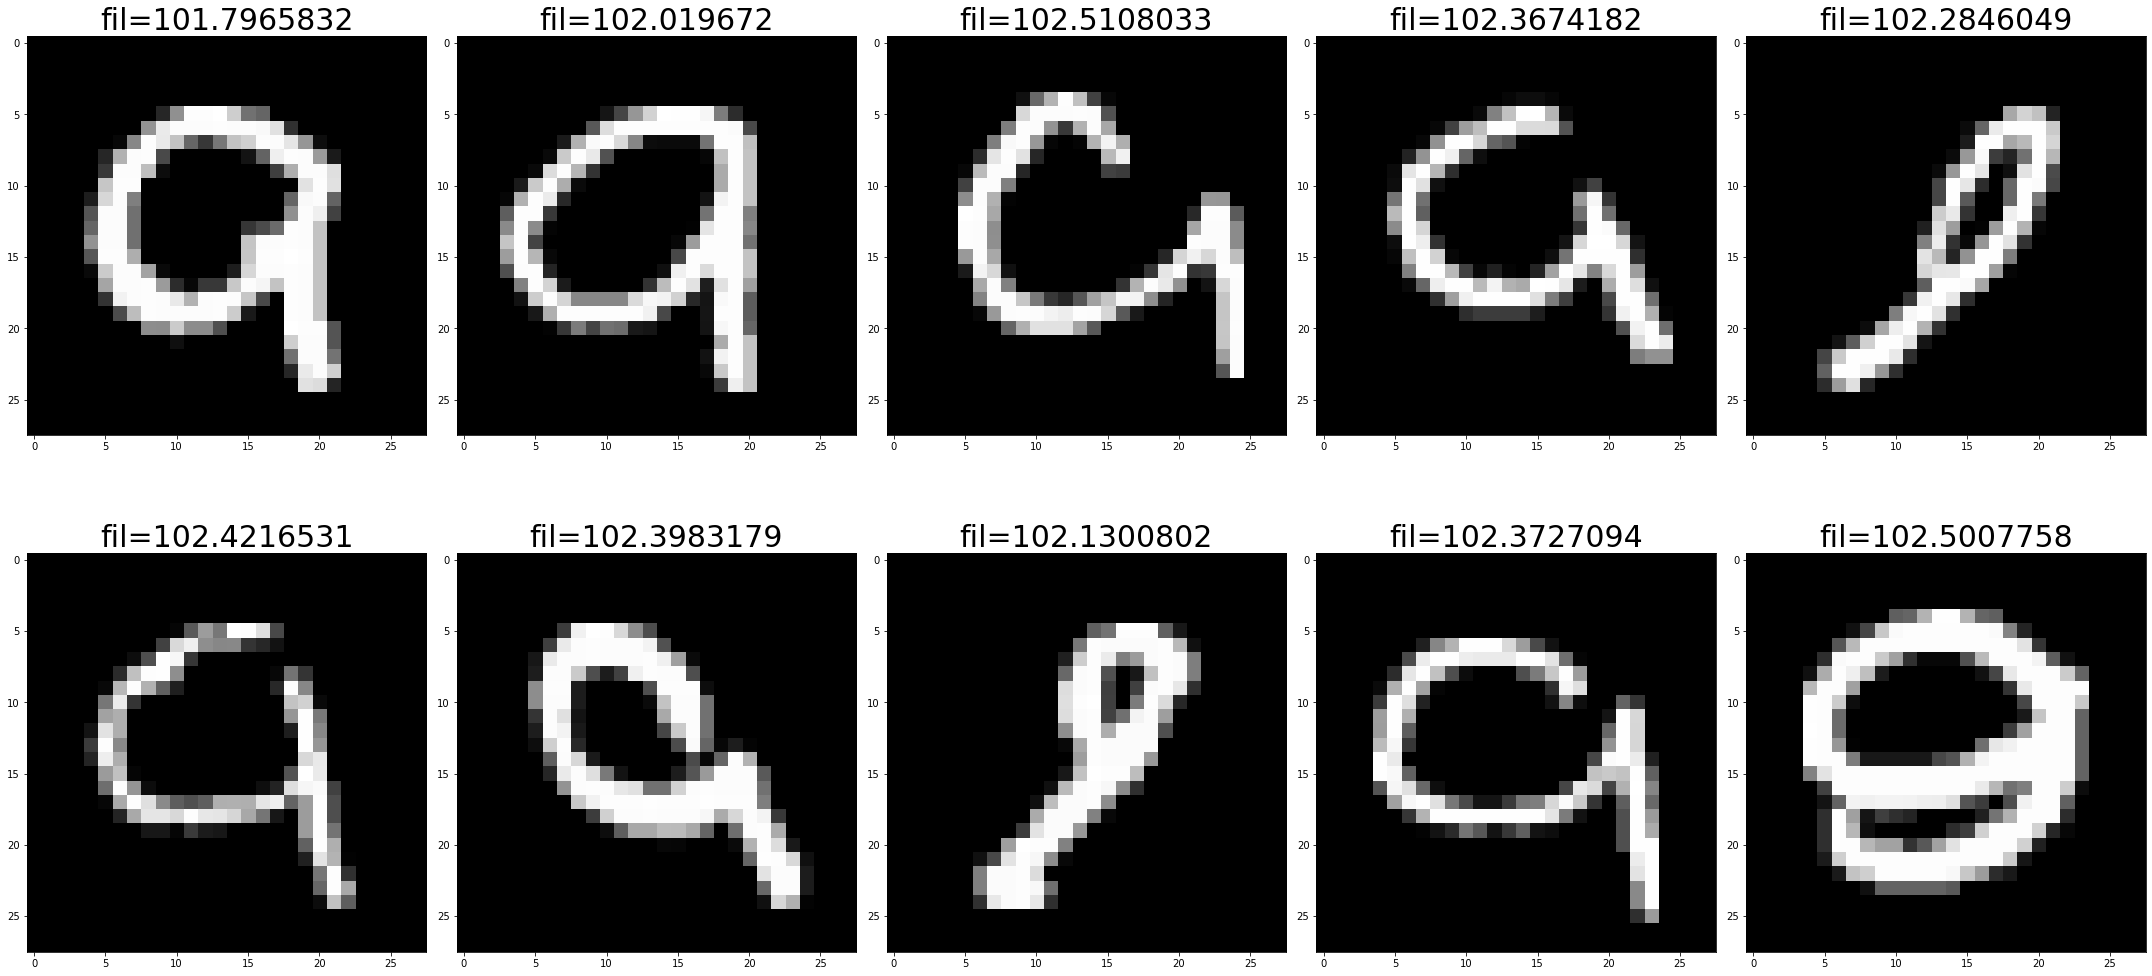

In [6]:
# Obtain data
from tensorflow.keras.datasets import mnist
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, Normalizer

for (num1, num2) in [(0, 1), (5, 8), (2, 9)]:

    (X_train, y_train), (X_test, y_test) = mnist.load_data()
    X_train, y_train, x_test, y_test = obtain_train_test_mnist(X_train, y_train, X_test, y_test, num1, num2)

    # perform PCA
    X_scaled = Normalizer().fit_transform(X_train) # if you do standardscaler it fails??
    X_mnist = PCA(n_components=20).fit_transform(X_scaled)

    # compute FILs
    fil_model = FIL_Logistic(lam=0)
    fil_model.train(X_mnist, y_train)
    all_fils = fil_model.compute_all_fils()

    print(fil_model.compute_accuracy(X_mnist, y_train))

    # show highest and lowest indices
    highest_indices = fil_model.highest_fils(10)
    lowest_indices = fil_model.lowest_fils(10)

    for indices, names in zip([lowest_indices, highest_indices], ["lowest", "highest"]):
        print(names)
        plt.figure(figsize=(30, 15))
        for i, idx in enumerate(indices):
            plt.subplot(2, 5, i+1)
            plt.title(f"fil={np.round(all_fils[idx], 7)}", fontdict = {'fontsize' : 30})
            plt.imshow(X_train[idx].reshape(28, 28), cmap='gray')
        plt.tight_layout()
        plt.savefig(f"{num1}and{num2}_{names}")
        plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=3414c8e1-e8f2-444e-be94-05f51d01b06b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>